In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
df_path="./Resources/AGE - household purchases Agg Data.csv"

In [4]:
df_age = pd.read_csv(df_path)

In [5]:
df_age.head ()

,Code,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,...,2014,2015,201516,201617,201718,201819,RSE indicator(a),% change since 201516,sig(b),trend since 201516(c)
0,cat520,Milk and milk products excluding cheese,NaN,NaN,NaN,30-39,ml,"1,813","1,780","1,776",...,"1,610","1,632","1,637","1,497","1,546","1,599",üü,-2,NaN,NaN
1,4006,NaN,"Liquid wholemilk, including school and welfare",NaN,NaN,30-39,ml,629,593,609,...,335,364,385,320,398,432,NaN,+12,NaN,NaN
2,4,NaN,NaN,"Liquid wholemilk, full price",NaN,30-39,ml,615,572,589,...,335,364,385,320,398,432,NaN,+12,NaN,NaN
3,402,NaN,NaN,NaN,UHT milk,30-39,ml,11,5,11,...,4,8,8,0,9,5,û,-30,NaN,NaN
4,403,NaN,NaN,NaN,Sterilised,30-39,ml,16,11,2,...,0,1,1,0,3,0,û,-100,NaN,NaN


In [6]:
cleandf=df_age.drop(["RSE indicator(a)", "% change since 201516", "sig(b)", "trend since 201516(c)", "Code" ],axis=1)
cleandf

,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2010,2011,2012,2013,2014,2015,201516,201617,201718,201819
0,Milk and milk products excluding cheese,NaN,NaN,NaN,30-39,ml,"1,813","1,780","1,776","1,781",...,"1,638","1,681","1,709","1,648","1,610","1,632","1,637","1,497","1,546","1,599"
1,NaN,"Liquid wholemilk, including school and welfare",NaN,NaN,30-39,ml,629,593,609,565,...,403,404,374,328,335,364,385,320,398,432
2,NaN,NaN,"Liquid wholemilk, full price",NaN,30-39,ml,615,572,589,547,...,403,404,374,328,335,364,385,320,398,432
3,NaN,NaN,NaN,UHT milk,30-39,ml,11,5,11,17,...,8,3,2,3,4,8,8,0,9,5
4,NaN,NaN,NaN,Sterilised,30-39,ml,16,11,2,5,...,0,0,4,0,0,1,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1682,NaN,NaN,Spirits,NaN,75_and_over,ml,63,61,59,42,...,51,51,55,49,59,58,53,54,73,47
1683,NaN,NaN,Liqueurs and cocktails,NaN,75_and_over,ml,3,7,4,6,...,8,8,5,7,3,9,9,11,11,4
1684,NaN,NaN,Alcopops,NaN,75_and_over,ml,1,2,4,1,...,0,7,4,4,4,1,1,1,7,0
1685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
cleandf.fillna("--")

,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2010,2011,2012,2013,2014,2015,201516,201617,201718,201819
0,Milk and milk products excluding cheese,--,--,--,30-39,ml,"1,813","1,780","1,776","1,781",...,"1,638","1,681","1,709","1,648","1,610","1,632","1,637","1,497","1,546","1,599"
1,--,"Liquid wholemilk, including school and welfare",--,--,30-39,ml,629,593,609,565,...,403,404,374,328,335,364,385,320,398,432
2,--,--,"Liquid wholemilk, full price",--,30-39,ml,615,572,589,547,...,403,404,374,328,335,364,385,320,398,432
3,--,--,--,UHT milk,30-39,ml,11,5,11,17,...,8,3,2,3,4,8,8,0,9,5
4,--,--,--,Sterilised,30-39,ml,16,11,2,5,...,0,0,4,0,0,1,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1682,--,--,Spirits,--,75_and_over,ml,63,61,59,42,...,51,51,55,49,59,58,53,54,73,47
1683,--,--,Liqueurs and cocktails,--,75_and_over,ml,3,7,4,6,...,8,8,5,7,3,9,9,11,11,4
1684,--,--,Alcopops,--,75_and_over,ml,1,2,4,1,...,0,7,4,4,4,1,1,1,7,0
1685,--,--,--,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--


In [8]:
#The popularity of fresh tomatoes within the 30-39 age group between 2001/2 and 2018/9

tominfo= cleandf.loc[(cleandf["Major Food Code"] == "Fresh tomatoes")]
tom2info=tominfo.loc[(tominfo["Age Group"]== "30-39")]
cleantom=tom2info.drop(["Food Category", "Food Group", "Minor Food Code", "Units", "Age Group","Major Food Code"], axis=1)
cleantom=cleantom.transpose()
cleantom.columns =[ 'Amount']
cleantom['Years'] = cleantom.index
cleantom.info ()


<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 2001-02 to 201819
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Amount  19 non-null     object
 1   Years   19 non-null     object
dtypes: object(2)
memory usage: 456.0+ bytes


## Notes for team!
So first use the cleandf and .loc to find your information, it should display for all age groups.  
If you need to narrow down further use .loc again or combine. Drop your additional columns, see above code for that.  
Transpose the code to make it easier to plot.  
Rename the transposed column.  
Clear and copy over index so you can plot values.  
check data types 

In [9]:
numtom=cleantom['Amount'].astype(int)
years=cleantom["Years"]

Here I am setting variable to plot with because I prefer pyplot, I have changed data type to integer too so I can plot it. 

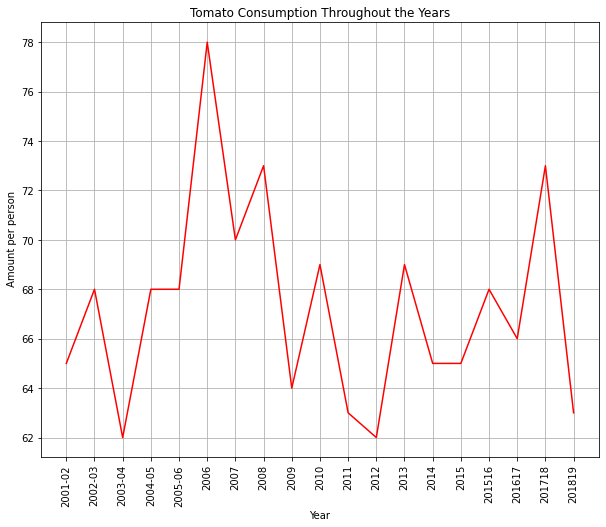

In [10]:
ln,plot=plt.subplots (figsize=(10, 8))
plt.plot(years,numtom,color="red")
plt.xticks(rotation=90)
plt.grid(True)
plt.xlabel("Year")
plt.ylabel(" Amount per person")
plt.title("Tomato Consumption Throughout the Years")
plt.show ()

In [11]:
#Why did it dip in 2012? Is it the same for the other age groups?
tominfo
cleantomall=tominfo.drop(["Food Category", "Food Group", "Minor Food Code", "Units","Age Group","Major Food Code"], axis=1)
cleantomall=cleantomall.transpose ()
cleantomall.columns =['30-39','40-49','50-64','65-74','75_and_over']
cleantomall['Years'] = cleantomall.index
cleantomall

,30-39,40-49,50-64,65-74,75_and_over,Years
2001-02,65,83,128,154,139,2001-02
2002-03,68,75,135,146,128,2002-03
2003-04,62,84,132,162,130,2003-04
2004-05,68,79,131,155,135,2004-05
2005-06,68,75,127,154,134,2005-06
2006,78,73,128,153,133,2006
2007,70,79,124,142,121,2007
2008,73,69,112,129,122,2008
2009,64,70,109,134,130,2009
2010,69,77,109,143,140,2010


Once again this is just data cleaning so you can actually use the data to plot with, because we are using multiple age groups I used the below code to convert col data types to int.
Im using pyplot because I feel like it's easier to manipulate, feel free to use pandas if you prefer, the data cleaning process should remain the same :)  

-Happy plotting, peace out 

In [12]:
fix=cleantomall.astype({'30-39': 'int64', '40-49': 'int64', '50-64': 'int64', '65-74': 'int64', '75_and_over':'int64' })
fix.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 2001-02 to 201819
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   30-39        19 non-null     int64 
 1   40-49        19 non-null     int64 
 2   50-64        19 non-null     int64 
 3   65-74        19 non-null     int64 
 4   75_and_over  19 non-null     int64 
 5   Years        19 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.0+ KB


In [13]:
alltomyears=fix["Years"]

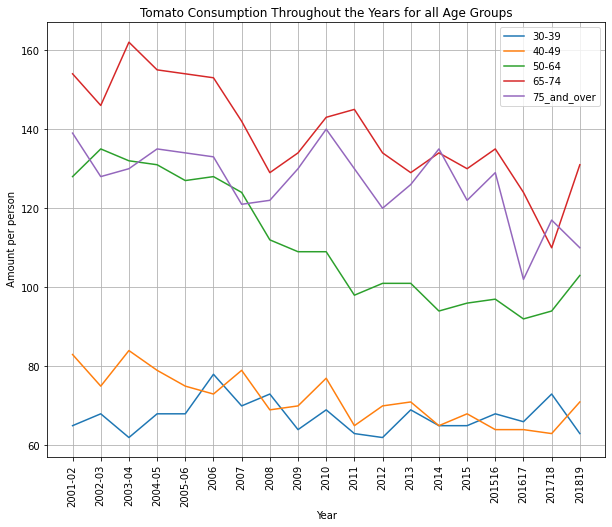

In [14]:
ln1,plot=plt.subplots (figsize=(10, 8))
plt.plot(alltomyears,fix['30-39'])
plt.plot(alltomyears,fix['40-49'])
plt.plot(alltomyears,fix['50-64'])
plt.plot(alltomyears,fix['65-74'])
plt.plot(alltomyears,fix['75_and_over'])
plt.legend (["30-39", "40-49", "50-64", "65-74", "75_and_over"], loc ="upper right")
plt.xticks(rotation=90)
plt.grid(True)
plt.xlabel("Year")
plt.ylabel(" Amount per person")
plt.title("Tomato Consumption Throughout the Years for all Age Groups")
plt.show ()

In [20]:
cleandf.describe()

,Total Amount Consumed
count,1687.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [17]:
cleandf['Total Amount Consumed'] = cleandf.sum(numeric_only=True, axis=1)
cleandf.head()

,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2011,2012,2013,2014,2015,201516,201617,201718,201819,Total Amount Consumed
0,Milk and milk products excluding cheese,NaN,NaN,NaN,30-39,ml,"1,813","1,780","1,776","1,781",...,"1,681","1,709","1,648","1,610","1,632","1,637","1,497","1,546","1,599",0.0
1,NaN,"Liquid wholemilk, including school and welfare",NaN,NaN,30-39,ml,629,593,609,565,...,404,374,328,335,364,385,320,398,432,0.0
2,NaN,NaN,"Liquid wholemilk, full price",NaN,30-39,ml,615,572,589,547,...,404,374,328,335,364,385,320,398,432,0.0
3,NaN,NaN,NaN,UHT milk,30-39,ml,11,5,11,17,...,3,2,3,4,8,8,0,9,5,0.0
4,NaN,NaN,NaN,Sterilised,30-39,ml,16,11,2,5,...,0,4,0,0,1,1,0,3,0,0.0


In [16]:
def sum_by_column(frame, new_col_name, list_of_cols_to_sum):
    frame[new_col_name] = frame[list_of_cols_to_sum].astype(float).sum(axis=1)
    return(frame)
                                               
sum_by_column(cleandf, 'Total Amount Consumed', ['2001-02','2002-03','2003-04','2004-05',])
cleandf.head()
               

ValueError: could not convert string to float: '1,813'

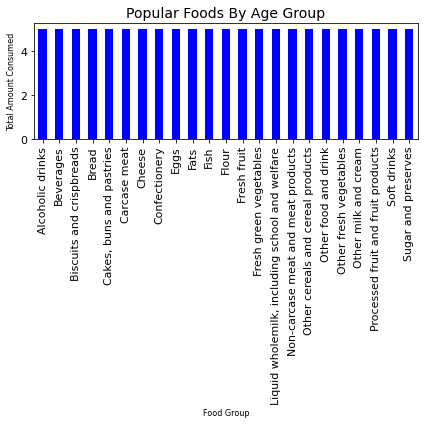

Food Group
Alcoholic drinks                                  5
Beverages                                         5
Biscuits and crispbreads                          5
Bread                                             5
Cakes, buns and pastries                          5
Carcase meat                                      5
Cheese                                            5
Confectionery                                     5
Eggs                                              5
Fats                                              5
Fish                                              5
Flour                                             5
Fresh fruit                                       5
Fresh green vegetables                            5
Liquid wholemilk, including school and welfare    5
Non-carcase meat and meat products                5
Other cereals and cereal products                 5
Other food and drink                              5
Other fresh vegetables                            5
O

In [19]:
popular_food_by_age = cleandf.groupby(["Food Group"]).count() ["Total Amount Consumed"]

plot_pandas = popular_food_by_age.plot.bar(figsize=(6,6), color='b',fontsize = 11)
popular_food_by_age
plt.xlabel("Food Group",fontsize = 8)
plt.ylabel("Total Amount Consumed",fontsize = 8)
plt.title("Popular Foods By Age Group",fontsize = 14)

plt.savefig("./Images/Popular Foods By Age Group.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

popular_food_by_age
               